---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Importing Libraries**](#Section32)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Description of the Dataset(s)**](#Section5)<br>
  5.1 [**Dataset Description**](#Section51)<br>
  5.2 [**Dataset Information**](#Section52)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Exploratory Data Analysis**](#Section7)<br>
  7.1 [**Distribution of Users(device_id) across States**](#Section71)</br>
  7.2 [**Distribution of Users across Phone Brands**](#Section72)</br>
  7.3 [**Distribution of Users across Gender**](#Section73)</br>
  7.4 [**Distribution of Users across Age Segments**](#Section74)</br>
  7.5 [**Distribution of Phone Brands for each Age Segment, State, Gender**](#Section75)</br>
  7.6 [**Distribution of Gender for each State, Age Segment and Phone Brand**](#Section76)</br>
  7.7 [**Distribution of Age Segments for each State, Gender and Phone Brand**](#Section77)</br>
  7.8 [**Plot the Users on the Map**](#Section78)</br>
8. [**Summarization**](#Section8)</br>
  8.1 [**Conclusion**](#Section81)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---

  - **InsaidTelecom** is one of the leading telecom players in India.

  - It is currently service **50 million** mobile devices active daily in India.

<p align="center"><img src="https://media.istockphoto.com/vectors/radio-tower-vector-id1184778656?s=612x612"></p>

---
<a name = Section2></a>
# **2. Problem Statement**
---

Based on the existing data available, **Insaid Telecom** behavioral data from more than 60% of the 50 million mobile devices active daily in India
to help its clients better understand and interact with their audiences.

Main objective is to analyze the data for **6 States [AndhraPradesh, Pondicherry, Mizoram, AndamanandNicobarIslands, Meghalaya, HimachalPradesh]** and come-up with the EDA on the below factors.

1. Distribution of Users(device_id) across States.

2. Distribution of Users across Phone Brands.

3. Distribution of Users across Gender.

4. Distribution of Users across Age Segments.

5. Distribution of Phone Brands for each Age Segment, State, Gender.

6. Distribution of Gender for each State, Age Segment and Phone Brand.

7. Distribution of Age Segments for each State, Gender and Phone Brand.

8. Hourly distribution of Phone Calls.

9. Plot the Users on the Map using any suitable package.

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

<a id = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
# Installing mysql-connector for connecting and getting the required datasets from mysql database
!pip install mysql-connector

# Installing googletrans for translating 'Chinese' words to 'English' words
!pip install googletrans==4.0.0rc1

# Installing folium to plot data over a map
!pip install folium pandas

     |████████████████████████████████| 11.9 MB 4.2 MB/s 
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247965 sha256=8983fb725c45b4755bece9d407483f21f3e61efdf1c6179a9e6ad6a02544b772
  Stored in directory: /root/.cache/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7
Successfully built mysql-connector
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 1.3 MB 8.4 MB/s 
     |████████████████████████████████| 65 kB 4.3 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=424b22000a5db9072862d02040f30bcbea73be22767ee7878c1edb7a01735142
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


<a id = Section32></a>
### **3.2 Importing Libraries**

In [1]:
import pandas as pd                                                 # Importing for panel data analysis
import numpy as np
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)

pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.6f' % x)         # To suppress scientific notation over exponential values

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

In [ ]:
# Importing the DataSet to a DataFrame

IT_Events_Data = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_InsaidTelecom/events_data.csv')

In [ ]:
# Code to import mysql.connector and connect to mysql source and get relevant table data 

import mysql.connector

conn = mysql.connector.connect(user='student', password='student',
                              host='cpanel.insaid.co',
                              database='Capstone1')

gender_age_query = "SELECT * FROM gender_age_train;"
phone_brand_query = "SELECT * FROM phone_brand_device_model;"
GA_Train = pd.read_sql(gender_age_query, conn)
PBD = pd.read_sql(phone_brand_query, conn)
conn.close()

In [ ]:
# save the datasets to google drive for accessing them next time

GA_Train.to_csv(r'/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_InsaidTelecom/gender_age_train.csv', index=False)
PBD.to_csv(r'/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_InsaidTelecom/phone_brand_device_model.csv', index=False)

In [ ]:
# Fetch the relevant datasets directly from google drive

GA_Train = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_InsaidTelecom/gender_age_train.csv')
PBD = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_InsaidTelecom/phone_brand_device_model.csv')

In [ ]:
IT_Events_Data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304.000000,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4734221357723754496.000000,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3264499652692492800.000000,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5731369272434022400.000000,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,338888002570799936.000000,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [ ]:
GA_Train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [ ]:
PBD.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


---
<a name = Section5></a>
# **5. Description of the Dataset(s)**
---

* This dataset provides the details of the **Insaid Telecom** users Phone Brands & models used, its Customers Age & Group, its daily events.

**events_data**

* Total of **3252950 records** available spanning around **28 States & 4 Union Territories**

|Id|Feature|Description|
|:--|:--|:--|
|01|event_id| Unique id generated for every usage by the User/Customer| 
|02|device_id| Device ID of a Phone| 
|03|timestamp| Date & Time when the event happened| 
|04|longitude| User Location in Longitude |
|05|latitude| User Location in Latitude|
|06|city| City to which the user belong to / phone number registered|
|07|state| State to which the user belong to / phone number registered|

**phone_brand_device_model**

* Total of **87726 records** available having **116 Phone brands** and **1467 Phone models** 

|Id|Feature|Description|
|:--|:--|:--|
|01|device_id| Device ID of a Phone| 
|02|phone_brand| Phone Brand name| 
|03|device_model| Phone Model name|

**gender_age_train**

* Total of **74645 records** available having data for **85 different age people** segregated between **12 age groups** registered between **Male & Female categories** 

|Id|Feature|Description|
|:--|:--|:--|
|01|device_id| Device ID of a Phone| 
|02|gender| Gender of the User| 
|03|age| Mobile User age|
|04|group| Age group in which the User belong to|

<a id = Section51></a>
### **5.1 Dataset(s) Description**

In [ ]:
IT_Events_Data.describe()

,event_id,device_id,longitude,latitude
count,3252950.000000,3252497.000000,3252527.000000,3252527.000000
mean,1626475.500000,101220009585509024.000000,78.158677,21.688514
std,939045.923418,5316758188197051392.000000,4.235570,5.789111
min,1.000000,-9222956879900150784.000000,12.567000,8.190110
25%,813238.250000,-4540611333857475072.000000,75.835430,17.801705
50%,1626475.500000,172682011159278816.000000,77.268142,22.164537
75%,2439712.750000,4861813234983622656.000000,80.319160,28.682778
max,3252950.000000,9222849349208140800.000000,95.459457,41.871900


In [ ]:
# Gender_Age_Train is positively skewed

GA_Train.describe()

,device_id,age
count,74645.000000,74645.000000
mean,-749135388419837.000000,31.410342
std,5327149733911456768.000000,9.868735
min,-9223067244542181376.000000,1.000000
25%,-4617366812584264704.000000,25.000000
50%,-18413620249632024.000000,29.000000
75%,4636655899093149696.000000,36.000000
max,9222849349208140800.000000,96.000000


In [ ]:
PBD.describe()

,device_id
count,87726.000000
mean,-5212556568047306.000000
std,5330156982713820160.000000
min,-9223321966609553408.000000
25%,-4623331173682123776.000000
50%,-31098020763804488.000000
75%,4635193992006549504.000000
max,9222849349208140800.000000


<a id = Section52></a>
### **5.2 Dataset Information**

In [ ]:
IT_Events_Data.info(verbose='True', memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   event_id   3252950 non-null  int64  
 1   device_id  3252497 non-null  float64
 2   timestamp  3252950 non-null  object 
 3   longitude  3252527 non-null  float64
 4   latitude   3252527 non-null  float64
 5   city       3252950 non-null  object 
 6   state      3252573 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 738.3 MB


In [ ]:
GA_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [ ]:
PBD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


**Observations**

Below is the observations on **events_data** dataset

  - Null values exist in **device_id, longitude, latitude** & **state** columns

  - **device_id** column is float64

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.

**1. events_data**

In [ ]:
#To convert device_id from float64 to int64 as device_id is displaying decimal values due to float data type settings

IT_Events_Data['device_id'] = IT_Events_Data['device_id'].astype('Int64')

In [ ]:
IT_Events_Data['state'].nunique()

32

In [ ]:
IT_Events_Data['state'].unique()

array(['Delhi', 'WestBengal', 'TamilNadu', 'Jharkhand', 'AndhraPradesh',
       'Maharashtra', 'Gujarat', 'Kerala', 'MadhyaPradesh', 'Karnataka',
       'Rajasthan', 'Orissa', 'Punjab', 'UttarPradesh', 'Nagaland',
       'Haryana', 'Telangana', 'Chhattisgarh', 'Bihar', 'JammuandKashmir',
       'Assam', 'Goa', 'Mizoram', 'Tripura', 'Uttaranchal', nan,
       'Pondicherry', 'Manipur', 'Meghalaya', 'ArunachalPradesh',
       'HimachalPradesh', 'Chandigarh', 'AndamanandNicobarIslands'],
      dtype=object)

**Observation:** *'nan'* data exist in 'state' column

In [ ]:
# To find how many 'null' records exist in 'state' column

IT_Events_Data['state'].isnull().sum()

377

**Action:** Use 'city' column and fill the missing 'state' values

In [ ]:
# Creating a new Dataframe to hold only the records which has 'null' values in 'state'

IT_ED_NullStates = IT_Events_Data[IT_Events_Data['state'].isnull()]
IT_ED_NullStates.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
2931,706554,-5829328361235250176,2016-05-05 16:58:46,73.851671,18.593313,Pune,NaN
16243,1918653,3137053756433768448,2016-05-03 00:46:10,83.326714,17.829748,Visakhapatnam,NaN
26956,1068940,-1752057305775059712,2016-05-04 16:09:17,75.930969,22.818845,Indore,NaN
30889,2164200,-394582654031064128,2016-05-04 19:33:09,83.366564,17.757190,Visakhapatnam,NaN
32685,460124,5536513450525271040,2016-05-01 21:30:10,80.359796,13.128174,Chennai,NaN


In [ ]:
IT_ED_NullStates['city'].nunique()

9

In [ ]:
IT_ED_NullStates['city'].unique()

array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

**Observation:** Our analysis is going to be mainly on 6 States/UTs, and hence we are focussing filling the missing 'state' values for these 6 States/UTs only.

1. AndhraPradesh
2. Pondicherry 
3. Mizoram
4. AndamanandNicobarIslands
5. Meghalaya
6. HimachalPradesh

In [ ]:
#Replacing null state values only for 'AndhraPradesh' as other cities are not part of 6 State/UTs. We are ignoring remaining 8 cities.

IT_Events_Data.loc[(IT_Events_Data['city'] =='Visakhapatnam') \
    & (IT_Events_Data['state'].isnull()),'state'] = 'AndhraPradesh'

In [ ]:
# New dataframe to hold the Null latitude records

IT_ED_NullLatitude = IT_Events_Data[IT_Events_Data['latitude'].isnull()]
IT_ED_NullLatitude.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
8015,2929521,1779631023439405312,2016-05-05 01:15:22,NaN,NaN,Delhi,Delhi
9697,1017749,-8790560034584249344,2016-05-03 17:22:52,NaN,NaN,Indore,MadhyaPradesh
10949,2132415,4865606571395668992,2016-05-07 19:57:06,NaN,NaN,Visakhapatnam,AndhraPradesh
16038,926804,7983871429718484992,2016-05-03 12:29:47,NaN,NaN,Chennai,TamilNadu
20586,3074782,-7364840628879980544,2016-05-04 19:39:28,NaN,NaN,Pune,Maharashtra


In [ ]:
# New DataFrame to hold the Null longitude records

IT_ED_NullLongitude = IT_Events_Data[IT_Events_Data['longitude'].isnull()]

In [ ]:
# To check, if 'NaN' in 'longitude' and 'latitude' are in the same rows

IT_ED_NullLatitude.equals(IT_ED_NullLongitude)

True

**Action:** Use 'city' column and fill the missing 'latitude' & 'longitude' values

In [ ]:
IT_ED_NullLatitude['city'].nunique()

9

In [ ]:
IT_ED_NullLatitude['city'].unique()

array(['Delhi', 'Indore', 'Visakhapatnam', 'Chennai', 'Pune', 'Jaipur',
       'Araria', 'Moga', 'Bagaha'], dtype=object)

In [ ]:
#Fetching only for 'Visakhapatnam' city which comes under AP and other 'cities' are not part of 6 State/UTs. We are ignoring remaining 8 cities.

IT_ED_NullLatitude[IT_ED_NullLatitude['state'] == 'AndhraPradesh']['device_id'].nunique()

3

In [ ]:
# To get the unique 'device_id' values that will be used to update the NaN 'latitude' records

DeviceID = IT_ED_NullLatitude[IT_ED_NullLatitude['state'] == 'AndhraPradesh']['device_id'].unique()

In [ ]:
# Based on the above 3 unique 'device_id' values, filtering the records
#DeviceID = [4865606571395668992, 5518659601894557696, -6033798388179802112]

Dev_ID = IT_Events_Data[IT_Events_Data['device_id'].isin(DeviceID)]

In [ ]:
Dev_ID.info(verbose=True, memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4173 entries, 1758 to 3252003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   event_id   4173 non-null   int64  
 1   device_id  4173 non-null   Int64  
 2   timestamp  4173 non-null   object 
 3   longitude  4110 non-null   float64
 4   latitude   4110 non-null   float64
 5   city       4173 non-null   object 
 6   state      4173 non-null   object 
dtypes: Int64(1), float64(2), int64(1), object(3)
memory usage: 1.0 MB


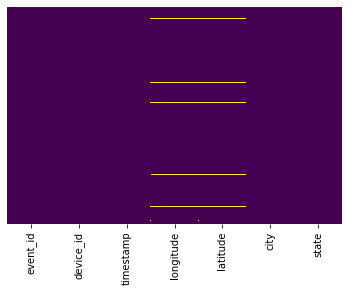

In [ ]:
# visually checking the Null/Nan values in the Dataset/Dataframe using heatmap

sns.heatmap(Dev_ID.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
Dev_ID.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
1758,1745199,5518659601894557696,2016-05-03 11:07:34,83.384242,17.817945,Visakhapatnam,AndhraPradesh
3886,595694,4865606571395668992,2016-05-06 06:22:01,83.351442,17.772252,Visakhapatnam,AndhraPradesh
5761,2830031,5518659601894557696,2016-05-05 13:41:53,83.384242,17.817945,Visakhapatnam,AndhraPradesh
6614,2657813,4865606571395668992,2016-05-07 13:55:58,83.351442,17.772252,Visakhapatnam,AndhraPradesh
7321,1474474,-6033798388179802112,2016-05-06 10:07:19,83.319787,17.816579,Visakhapatnam,AndhraPradesh


In [ ]:
# To find, if the specific 'device_id' is having unique 'latitude' & 'longitude' values.
# If Yes, same 'latitude' & 'longitude' values can be used for updating other records which has the same 'device_id'

#Dev_ID[Dev_ID['device_id'] == -6033798388179802112]['longitude'].nunique()
Dev_ID[Dev_ID['device_id'] == -6033798388179802112]['latitude'].nunique()

1

In [ ]:
#Replacing 'NaN' values for 'longitude' & 'latitude' columns only for `AndraPradesh`/'Visakhapatnam'

IT_Events_Data.loc[(IT_Events_Data['state'] == 'AndhraPradesh') & (IT_Events_Data['city'] == 'Visakhapatnam') & (IT_Events_Data['device_id'] == 5518659601894557696) \
    & (IT_Events_Data['longitude'].isnull()),'longitude'] = 83.38424
IT_Events_Data.loc[(IT_Events_Data['state'] == 'AndhraPradesh') & (IT_Events_Data['city'] == 'Visakhapatnam') & (IT_Events_Data['device_id'] == 5518659601894557696)\
    & (IT_Events_Data['latitude'].isnull()),'latitude'] = 17.81795

IT_Events_Data.loc[(IT_Events_Data['state'] == 'AndhraPradesh') & (IT_Events_Data['city'] == 'Visakhapatnam') & (IT_Events_Data['device_id'] == 4865606571395668992) \
    & (IT_Events_Data['longitude'].isnull()),'longitude'] = 83.35144
IT_Events_Data.loc[(IT_Events_Data['state'] == 'AndhraPradesh') & (IT_Events_Data['city'] == 'Visakhapatnam') & (IT_Events_Data['device_id'] == 4865606571395668992)\
    & (IT_Events_Data['latitude'].isnull()),'latitude'] = 17.77225

IT_Events_Data.loc[(IT_Events_Data['state'] == 'AndhraPradesh') & (IT_Events_Data['city'] == 'Visakhapatnam') & (IT_Events_Data['device_id'] == -6033798388179802112) \
    & (IT_Events_Data['longitude'].isnull()),'longitude'] = 83.31979
IT_Events_Data.loc[(IT_Events_Data['state'] == 'AndhraPradesh') & (IT_Events_Data['city'] == 'Visakhapatnam') & (IT_Events_Data['device_id'] == -6033798388179802112)\
    & (IT_Events_Data['latitude'].isnull()),'latitude'] = 17.81658

In [ ]:
IT_Events_Data.info(verbose=True, memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   event_id   3252950 non-null  int64  
 1   device_id  3252497 non-null  Int64  
 2   timestamp  3252950 non-null  object 
 3   longitude  3252590 non-null  float64
 4   latitude   3252590 non-null  float64
 5   city       3252950 non-null  object 
 6   state      3252620 non-null  object 
dtypes: Int64(1), float64(2), int64(1), object(3)
memory usage: 741.4 MB


**Action:** Use 'city', 'state', 'latitude' & 'longitude' columns to fill missing 'device_id' values

In [ ]:
# To filter the records which has no 'device_id'

IT_ED_NullDevID = IT_Events_Data[IT_Events_Data['device_id'].isnull()]
IT_ED_NullDevID.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude      0
latitude       0
city           0
state          0
dtype: int64

In [ ]:
IT_ED_NullDevID['state'].unique()

array(['MadhyaPradesh', 'Rajasthan', 'Punjab', 'Maharashtra',
       'AndhraPradesh', 'Delhi', 'TamilNadu', 'Gujarat'], dtype=object)

In [ ]:
# Filter only the null records that belongs to 'AndhraPradesh' as the remaining 5 States/UT's not in the above 'null' list.

IT_ED_NullDevID[(IT_ED_NullDevID['state'] == 'AndhraPradesh')].head()

,event_id,device_id,timestamp,longitude,latitude,city,state
66694,2909778,<NA>,2016-05-01 13:25:17,83.357991,17.805195,Visakhapatnam,AndhraPradesh
161774,2097027,<NA>,2016-05-05 14:03:16,83.357991,17.805195,Visakhapatnam,AndhraPradesh
192510,455192,<NA>,2016-05-07 15:20:42,83.371738,17.752819,Visakhapatnam,AndhraPradesh
206764,1389227,<NA>,2016-05-06 11:55:57,83.342711,17.822906,Visakhapatnam,AndhraPradesh
249177,1852699,<NA>,2016-05-04 12:18:57,83.342711,17.822906,Visakhapatnam,AndhraPradesh


In [ ]:
# To see how many 'longitude' values for the empty 'device_id' records
IT_ED_NullDevID[IT_ED_NullDevID['state'] == 'AndhraPradesh']['longitude'].nunique()

3

In [ ]:
# To get the unique 'longitude' records
IT_ED_NullDevID[IT_ED_NullDevID['state'] == 'AndhraPradesh']['longitude'].unique()

array([83.357991, 83.371738, 83.342711])

In [ ]:
# To see how many 'latitude' values for the empty 'device_id' records
IT_ED_NullDevID[IT_ED_NullDevID['state'] == 'AndhraPradesh']['latitude'].nunique()

3

In [ ]:
# To get the unique 'latitude' records
IT_ED_NullDevID[IT_ED_NullDevID['state'] == 'AndhraPradesh']['latitude'].unique()

array([17.805195, 17.752819, 17.822906])

In [ ]:
# To fetch the 'device_id' for the matching 'longitude' & 'latitude' records
IT_Events_Data[(IT_Events_Data['longitude'] == 83.357991) & (IT_Events_Data['latitude'] == 17.805195)]['device_id'].unique()

<IntegerArray>
[6844192269280790528, <NA>]
Length: 2, dtype: Int64

In [ ]:
# To fetch the 'device_id' for the matching 'longitude' & 'latitude' records
IT_Events_Data[(IT_Events_Data['longitude'] == 83.371738) & (IT_Events_Data['latitude'] == 17.752819)]['device_id'].unique()

<IntegerArray>
[-3130903177076173312, <NA>]
Length: 2, dtype: Int64

In [ ]:
# To fetch the 'device_id' for the matching 'longitude' & 'latitude' records
IT_Events_Data[(IT_Events_Data['longitude'] == 83.342711) & (IT_Events_Data['latitude'] == 17.822906)]['device_id'].unique()

<IntegerArray>
[6619714762103552000, <NA>]
Length: 2, dtype: Int64

In [ ]:
# Update the 'device_id' which is 'NaN'
IT_Events_Data.loc[(IT_Events_Data['state'] == 'AndhraPradesh') & (IT_Events_Data['city'] == 'Visakhapatnam') \
                   & (IT_Events_Data['longitude'] == 83.357991) & (IT_Events_Data['latitude'] == 17.805195) \
                   & (IT_Events_Data['device_id'].isnull()),'device_id'] = 6844192269280790528

IT_Events_Data.loc[(IT_Events_Data['state'] == 'AndhraPradesh') & (IT_Events_Data['city'] == 'Visakhapatnam') \
                   & (IT_Events_Data['longitude'] == 83.371738) & (IT_Events_Data['latitude'] == 17.752819) \
                   & (IT_Events_Data['device_id'].isnull()),'device_id'] = -3130903177076173312

IT_Events_Data.loc[(IT_Events_Data['state'] == 'AndhraPradesh') & (IT_Events_Data['city'] == 'Visakhapatnam') \
                   & (IT_Events_Data['longitude'] == 83.342711) & (IT_Events_Data['latitude'] == 17.822906) \
                   & (IT_Events_Data['device_id'].isnull()),'device_id'] = 6619714762103552000

In [ ]:
# Creating a new DataFrame to check, if the update was SUCCESSFUL or NOT

IT_ED_NullDevID_check = IT_Events_Data[IT_Events_Data['device_id'].isnull()]

In [ ]:
# 0 records returned for empty 'device_id' for 'AndhraPradesh' state

IT_ED_NullDevID_check[(IT_ED_NullDevID_check['state'] == 'AndhraPradesh')].head()

,event_id,device_id,timestamp,longitude,latitude,city,state


In [ ]:
IT_Events_Data.info(verbose='True', memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   event_id   3252950 non-null  int64  
 1   device_id  3252566 non-null  Int64  
 2   timestamp  3252950 non-null  object 
 3   longitude  3252590 non-null  float64
 4   latitude   3252590 non-null  float64
 5   city       3252950 non-null  object 
 6   state      3252620 non-null  object 
dtypes: Int64(1), float64(2), int64(1), object(3)
memory usage: 741.4 MB


In [ ]:
# Fetch the 'device_id' of the 6 states to check if the same device_id is in other states as well

state_filter = ['AndhraPradesh', 'Pondicherry', 'Mizoram', 'AndamanandNicobarIslands', 'Meghalaya', 'HimachalPradesh']

state_Device_ID = IT_Events_Data[(IT_Events_Data['state'].isin(state_filter))]['device_id'].unique()

In [ ]:
print(state_Device_ID)

<IntegerArray>
[ -512424213979236416, -8879643774076165120,  -601883305299256832,
 -2764520535330416640,  4986891477794016256,  8986178529983323136,
  1781207162246898688, -7977473090891298816,  -626489962741092096,
  1769320069082027776,
 ...
 -2543634717554077696, -4195605545446932992,  5592065276904214528,
  3345889484624384000, -3598741577135566848, -5246983015387275264,
 -3403327378839290880, -4219481726229605376,  1343667561591912192,
 -2737906663746405376]
Length: 5223, dtype: Int64


In [ ]:
# Checking the 6 state device id's are there in other state records
# OUTPUT: 0 records [6 state 'device_id' is not in other states]

IT_Events_Data[(~IT_Events_Data['state'].isin(state_filter)) & (IT_Events_Data['device_id'].isin(state_Device_ID))]['device_id'].nunique()

0

In [ ]:
IT_Events_Data['state'].isin(state_filter).sum()

329172

**NOTE:** Creating a new Dataset/Dataframe only on the 6 States/UTs on 'events_data' 

In [ ]:
# Creating a new 'DataFrame' for the 6 states

IT_ED_1011 = IT_Events_Data[IT_Events_Data.state.isin(state_filter)]

In [ ]:
IT_ED_1011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329172 entries, 5 to 3252948
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   329172 non-null  int64  
 1   device_id  329172 non-null  Int64  
 2   timestamp  329172 non-null  object 
 3   longitude  329172 non-null  float64
 4   latitude   329172 non-null  float64
 5   city       329172 non-null  object 
 6   state      329172 non-null  object 
dtypes: Int64(1), float64(2), int64(1), object(3)
memory usage: 20.4+ MB


In [ ]:
# Saving it to google drive, so that next time i can connect to this dataset directly

IT_ED_1011.to_csv(r'/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_InsaidTelecom/IT_ED_1011.csv', index=False)

In [ ]:
# Read the csv file directly rather than going through the above steps

IT_ED_1011 = pd.read_csv(r'/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_InsaidTelecom/IT_ED_1011.csv')

In [ ]:
# No duplicates in IT Events data for Filter 6 states

IT_ED_1011[IT_ED_1011.duplicated()]

,event_id,device_id,timestamp,longitude,latitude,city,state


In [ ]:
# To check, if our DataFrame has any NULL values or not.
# Here, we don't have any NULL columns

null_columns = IT_ED_1011.columns[IT_ED_1011.isnull().any()]
IT_ED_1011[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
IT_ED_1011['state'].value_counts()

AndhraPradesh               321379
Pondicherry                   1741
Mizoram                       1613
Meghalaya                     1515
AndamanandNicobarIslands      1515
HimachalPradesh               1409
Name: state, dtype: int64

In [ ]:
IT_ED_1011['city'].nunique()

113

**2. gender_age_train**

In [ ]:
GA_Train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [ ]:
# No duplicates in Gender_Age_Train

GA_Train[GA_Train.duplicated()]

,device_id,gender,age,group


In [ ]:
# No Null/na values in Gender_age_Train

GA_Train_Null = GA_Train[GA_Train.isna().any(axis=1)]
GA_Train_Null

,device_id,gender,age,group


In [ ]:
GA_Train['device_id'].nunique()

74645

In [ ]:
GA_Train['age'].nunique()

85

In [ ]:
GA_Train['age'].value_counts().head()

26    4540
27    4476
29    4343
28    4087
25    3740
Name: age, dtype: int64

In [ ]:
GA_Train['gender'].nunique()

2

In [ ]:
GA_Train['gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
GA_Train['group'].nunique()

12

In [ ]:
# Get the list of groups

pd.DataFrame(sorted(GA_Train['group'].unique()))

,0
0,F23-
1,F24-26
2,F27-28
3,F29-32
4,F33-42
5,F43+
6,M22-
7,M23-26
8,M27-28
9,M29-31


In [ ]:
pd.DataFrame(GA_Train['group'].value_counts())

,group
M23-26,9605
M32-38,9476
M39+,8581
M22-,7488
M29-31,7309
F33-42,5561
M27-28,5445
F23-,5050
F29-32,4628
F43+,4194


In [ ]:
# Find which gender has maximum records

pd.DataFrame(GA_Train['gender'].value_counts())

,gender
M,47904
F,26741


**3. phone_brand_device_model**

In [ ]:
# No duplicates in Phone_Brand_Device

PBD[PBD.duplicated()]

,device_id,phone_brand,device_model


In [ ]:
# To check if there are any duplicates in 'device_id'

PBD[PBD['device_id'].duplicated()]

,device_id,phone_brand,device_model


In [ ]:
PBD.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [ ]:
# No Null values in this dataset

PBD_Null = PBD[PBD.isna().any(axis=1)]
PBD_Null

,device_id,phone_brand,device_model


In [ ]:
PBD['device_model'].nunique()

1467

In [ ]:
PBD['device_model'].unique()

array(['Y13', 'V183', 'R7s', ..., 'Galaxy Tab S T705', 'IVO 8800',
       'U59GT'], dtype=object)

In [ ]:
PBD['phone_brand'].nunique()

116

In [ ]:
PBD['phone_brand'].unique()

array(['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], dtype=object)

In [ ]:
pd.DataFrame(PBD['phone_brand'].value_counts()).head()

,phone_brand
小米,21645
三星,19211
华为,15181
vivo,7596
OPPO,6717


In [ ]:
# Create a new dataset to have the Phone model 

phone_brand = pd.DataFrame(PBD['phone_brand'].unique())
phone_brand.columns = ['chinese']
phone_brand.head()

,chinese
0,vivo
1,小米
2,OPPO
3,三星
4,酷派


In [ ]:
phone_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   chinese  116 non-null    object
dtypes: object(1)
memory usage: 1.0+ KB


In [ ]:
import googletrans
from googletrans import Translator

#initialize the Translator
translator = Translator()

In [ ]:
print("Number of Supported Languages:", len(googletrans.LANGUAGES)) 
print(googletrans.LANGUAGES)

Number of Supported Languages: 107
{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky'

In [ ]:
phone_brand['Phone_Brand_EN'] = ""

In [ ]:
#translated_text = translator.translate('魅族', src='zh-tw', dest = 'en')
#print(translated_text.text)

j=0
rows = len(phone_brand['chinese'])

while j < rows:
    pb = translator.translate(phone_brand['chinese'][j], src='zh-tw', dest = 'en')
    phone_brand['Phone_Brand_EN'][j] = pb.text
    j = j+1

In [ ]:
phone_brand.head()

,chinese,Phone_Brand_EN
0,vivo,Vivo
1,小米,Millet
2,OPPO,OPPO
3,三星,Samsung
4,酷派,Cool


In [ ]:
PBD = pd.merge(PBD, phone_brand, left_on='phone_brand', right_on='chinese')

In [ ]:
PBD.tail(10)

,device_id,phone_brand,device_model,chinese,Phone_Brand_EN
87716,5489607796787403797,奥克斯,V965T,奥克斯,Ox
87717,-4567000646686758042,奥克斯,V965T,奥克斯,Ox
87718,-231815432814429273,奥克斯,V965T,奥克斯,Ox
87719,8567026160899753334,奥克斯,V965T,奥克斯,Ox
87720,-801396569287331168,西门子,Gigaset ME,西门子,Siemens
87721,-8463760279549544397,欧乐迪,Z1988,欧乐迪,Orei
87722,-1827265414361726037,欧乐迪,Z1988,欧乐迪,Orei
87723,2199613157955485294,欧乐迪,Z1988,欧乐迪,Orei
87724,-5387173829047621361,PPTV,King 7,PPTV,PPTV
87725,-8790560034584248901,PPTV,King 7s,PPTV,PPTV


In [ ]:
PBD.drop(['phone_brand', 'chinese'], axis=1, inplace=True)

In [ ]:
PBD.head()

,device_id,device_model,Phone_Brand_EN
0,1877775838486905855,Y13,Vivo
1,-8705713195059105949,X6 L,Vivo
2,7284092388756598809,Y35,Vivo
3,-298209719519394007,Xperia SL,Vivo
4,5191524460861112478,Y17T,Vivo


In [ ]:
PBD[['Phone_Brand_EN', 'device_model']].value_counts().head()

Phone_Brand_EN  device_model 
Millet          红米note           3500
                MI 3             2739
                MI 2S            2547
Samsung         Galaxy Note 3    2378
Millet          MI 4             2256
dtype: int64

In [ ]:
PBD.to_csv(r'/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_InsaidTelecom/PBD_Final.csv', index=False)

In [ ]:
PBD = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_InsaidTelecom/PBD_Final.csv')

In [ ]:
PBD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   device_id       87726 non-null  int64 
 1   device_model    87726 non-null  object
 2   Phone_Brand_EN  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
PBD.head()

,device_id,device_model,Phone_Brand_EN
0,1877775838486905855,Y13,Vivo
1,-8705713195059105949,X6 L,Vivo
2,7284092388756598809,Y35,Vivo
3,-298209719519394007,Xperia SL,Vivo
4,5191524460861112478,Y17T,Vivo



**Integrate all 3 Datasets into 1 for further analysis**


In [ ]:
Insaid_Telecom = PBD.merge(GA_Train, on='device_id').merge(IT_ED_1011, on='device_id')

In [3]:
Insaid_Telecom = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_InsaidTelecom/Insaid_Telecom.csv')

In [4]:
Insaid_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   device_id       791 non-null    int64  
 1   device_model    791 non-null    object 
 2   Phone_Brand_EN  791 non-null    object 
 3   gender          791 non-null    object 
 4   age             791 non-null    int64  
 5   group           791 non-null    object 
 6   event_id        791 non-null    int64  
 7   timestamp       791 non-null    object 
 8   longitude       791 non-null    float64
 9   latitude        791 non-null    float64
 10  city            791 non-null    object 
 11  state           791 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 74.3+ KB


In [ ]:
Insaid_Telecom.describe()

,device_id,age,event_id,longitude,latitude
count,791.000000,791.000000,791.000000,791.000000,791.000000
mean,-127995008443430512.000000,33.121365,1614291.989886,80.233427,17.211623
std,1271052773466399744.000000,9.362891,943779.914581,2.431340,1.398863
min,-6289140063501067264.000000,21.000000,6173.000000,76.934556,10.949680
25%,-1180228997135426560.000000,27.000000,781440.500000,78.534009,17.105758
50%,-6552729385743211.000000,34.000000,1627813.000000,79.512700,17.591187
75%,105387424403700736.000000,38.000000,2413175.000000,83.315734,17.811331
max,4184872012668940800.000000,79.000000,3249410.000000,83.379038,19.741445


In [ ]:
Insaid_Telecom.head(10)

,device_id,device_model,Phone_Brand_EN,gender,age,group,event_id,timestamp,longitude,latitude,city,state
0,-6552729385743211,X3T,Vivo,M,28,M27-28,3078973,2016-05-07 21:41:38,78.487472,17.338947,Rajendranagar,AndhraPradesh
1,-6552729385743211,X3T,Vivo,M,28,M27-28,695286,2016-05-07 22:40:59,78.487472,17.338947,Rajendranagar,AndhraPradesh
2,-6552729385743211,X3T,Vivo,M,28,M27-28,2866467,2016-05-07 22:42:31,78.487472,17.338947,Rajendranagar,AndhraPradesh
3,-6552729385743211,X3T,Vivo,M,28,M27-28,2816043,2016-05-04 22:31:13,78.487472,17.338947,Rajendranagar,AndhraPradesh
4,-6552729385743211,X3T,Vivo,M,28,M27-28,2135433,2016-05-04 22:13:20,78.487472,17.338947,Rajendranagar,AndhraPradesh
5,-6552729385743211,X3T,Vivo,M,28,M27-28,1787494,2016-05-04 22:45:59,78.487472,17.338947,Rajendranagar,AndhraPradesh
6,-6552729385743211,X3T,Vivo,M,28,M27-28,1212336,2016-05-04 21:44:35,78.487472,17.338947,Rajendranagar,AndhraPradesh
7,-6552729385743211,X3T,Vivo,M,28,M27-28,2683456,2016-05-07 22:45:36,78.487472,17.338947,Rajendranagar,AndhraPradesh
8,-6552729385743211,X3T,Vivo,M,28,M27-28,237777,2016-05-04 22:33:57,78.487472,17.338947,Rajendranagar,AndhraPradesh
9,-6552729385743211,X3T,Vivo,M,28,M27-28,754194,2016-05-04 21:13:51,78.487472,17.338947,Rajendranagar,AndhraPradesh


In [ ]:
Insaid_Telecom['device_id'].nunique()

36

In [ ]:
Insaid_Telecom.to_csv('/content/gdrive/My Drive/Colab_Notebooks/Insaid/CapstoneProject_InsaidTelecom/Insaid_Telecom.csv', index=False)

**Validation:** Below section is used to validate, if only 36 Devices are ONLY there in the 6 states data

In [ ]:
IT_ED_1011['device_id'].nunique()

5223

In [ ]:
did = IT_ED_1011['device_id'].unique()
print(did)

<IntegerArray>
[ -512424213979236416, -8879643774076165120,  -601883305299256832,
 -2764520535330416640,  4986891477794016256,  8986178529983323136,
  1781207162246898688, -7977473090891298816,  -626489962741092096,
  1769320069082027776,
 ...
 -2543634717554077696, -4195605545446932992,  5592065276904214528,
  3345889484624384000, -3598741577135566848, -5246983015387275264,
 -3403327378839290880, -4219481726229605376,  1343667561591912192,
 -2737906663746405376]
Length: 5223, dtype: Int64


In [ ]:
GA_Train[GA_Train['device_id'].isin(did)]['device_id'].nunique()

36

In [ ]:
didgatrain = GA_Train[GA_Train['device_id'].isin(did)]['device_id'].unique()
print(didgatrain)

[   -6552729385743211  -258158835257519424 -1328789920050419200
     8492297012485123  -479132454500793152   105387424403700736
  -594711597881402752  1697086779705292288  3366457370437155328
 -1180228997135426560 -1531639076514616064    -1364213210730105
   333494090404734400  1138187655496362624  1130552261806985088
 -1183841080398208256    29487598347576048  4184872012668940800
   -23366031018699840 -1112782029313838720 -1438495210756671488
   237767835584813856  2111248373247544064 -6289140063501067264
   -31741542980781836  -279317695185245376   419885172081269696
   700156737670276608 -4647981010574665728  1910762255583389952
   -28492619212284472   -34779641846092840 -1025466934738207744
  -548549229804626560   205679329653904000 -1870074800027757568]


In [ ]:
PBD[PBD['device_id'].isin(didgatrain)]['device_id'].nunique()

36

---
<a name = Section7></a>
# **7. Exploratory Data Analysis**
---

Using the data filtered, will analyze it

<a id = Section71></a>
#### **7.1. Distribution of Users(device_id) across States**

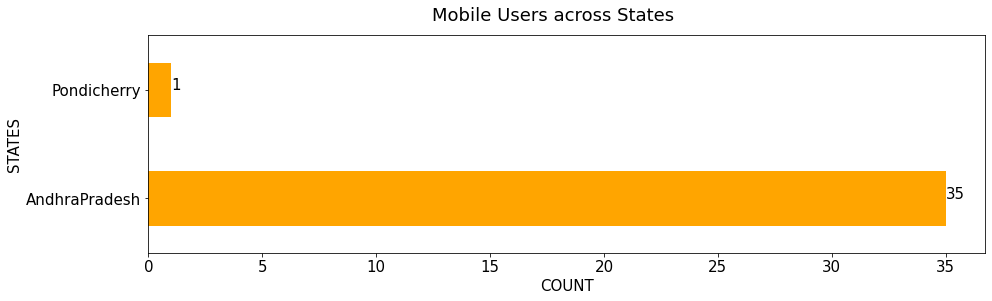

In [ ]:
#To set the font size as 15 for the chart
plt.rcParams.update({'font.size': 15})

state_users = Insaid_Telecom.groupby(['state'])['device_id'].nunique()

state_users.plot(kind='barh', figsize = (15, 4), color='orange')
plt.xlabel('COUNT')
plt.ylabel('STATES')
plt.suptitle('Mobile Users across States', fontsize = 18)

for index, value in enumerate(state_users):
  plt.text(value, index, str(value))

<a id = Section72></a>
#### **7.2. Distribution of Users across Phone Brands**

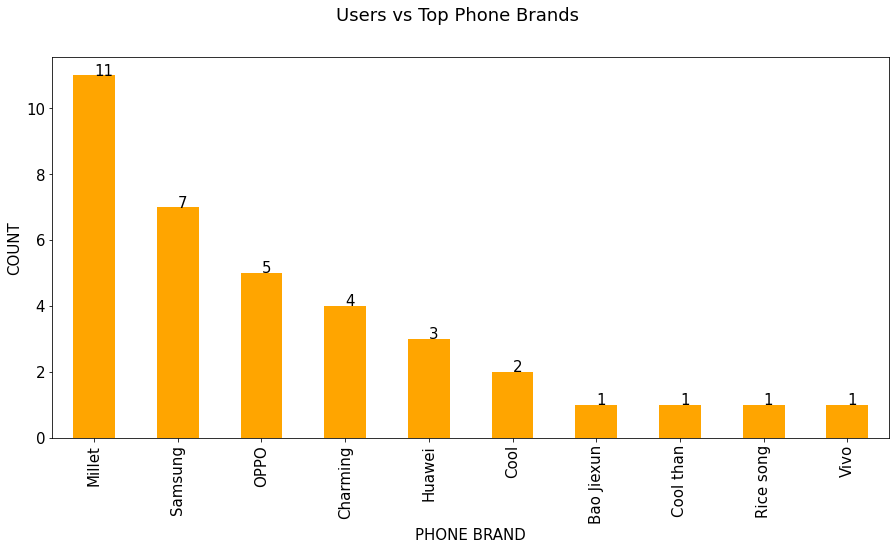

In [ ]:
#UsersPhoneBrand = pd.DataFrame(Insaid_Telecom.groupby(['Phone_Brand_EN'])['device_id'].nunique())
#UsersPhoneBrand.sort_values(by=['device_id'], ascending=False)

UsersPhoneBrand = Insaid_Telecom.groupby(['Phone_Brand_EN'])['device_id'].nunique().sort_values(ascending=False)
UsersPhoneBrand.plot(kind='bar', figsize = (15, 7), color='orange')

plt.xlabel('PHONE BRAND')
plt.ylabel('COUNT')
plt.suptitle('Users vs Top Phone Brands', fontsize = 18)

for index, value in enumerate(UsersPhoneBrand):
  plt.text(index, value, str(value))

<a id = Section73></a>
#### **7.3. Distribution of Users across Gender**

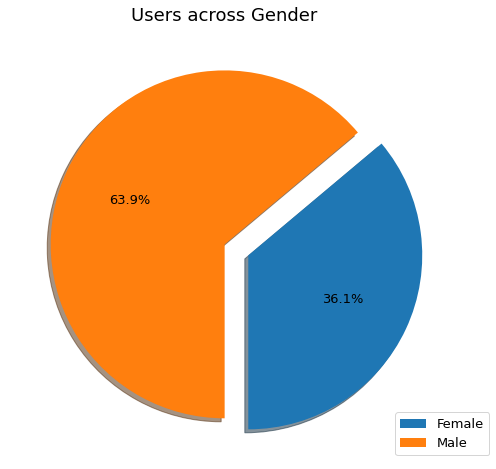

In [ ]:
fix, ax = plt.subplots(figsize = (20, 8))
labels = ['Female', 'Male']

Insaid_Telecom.groupby(['gender'])['device_id'].nunique().plot.pie(startangle = 270, ax = ax, explode = [0.15, 0], autopct='%1.1f%%', shadow=True, fontsize = 13, labels=['', ''])

ax.set_title('Users across Gender')
ax.set_ylabel(None)
plt.legend(loc='lower center', labels=labels, fontsize= 13, bbox_to_anchor=(1, 0))

plt.show()

<a id = Section74></a>
#### **7.4. Distribution of Users across Age Segments**

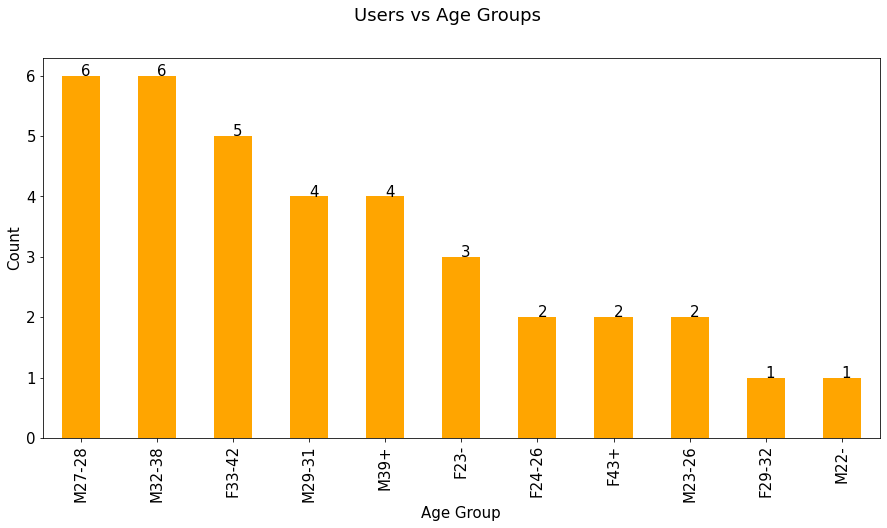

In [ ]:
UsersGroup = Insaid_Telecom.groupby(['group'])['device_id'].nunique().sort_values(ascending=False)

#UsersPhoneBrand = Insaid_Telecom.groupby(['Phone_Brand_EN'])['device_id'].nunique().sort_values(ascending=False)
UsersGroup.plot(kind='bar', figsize = (15, 7), color='orange')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.suptitle('Users vs Age Groups', fontsize = 18)

for index, value in enumerate(UsersGroup):
  plt.text(index, value, str(value))

<a id = Section75></a>
#### **7.5. Distribution of Phone Brands for each Age Segment, State, Gender**

Text(199.0, 0.5, 'Age Group')

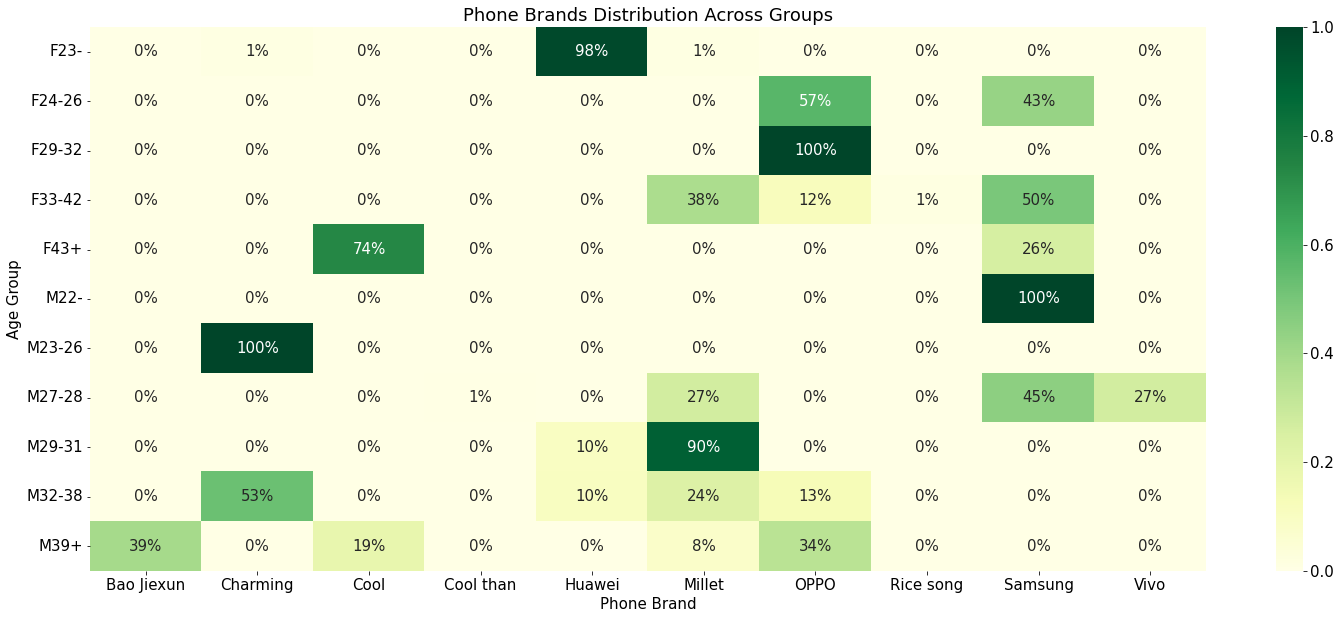

In [ ]:
plt.figure(figsize=(25,10))
role_ed_xtab = pd.crosstab(Insaid_Telecom['group'], Insaid_Telecom['Phone_Brand_EN'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlGn')
plt.title("Phone Brands Distribution Across Groups")
plt.xlabel('Phone Brand')
plt.ylabel('Age Group')

Text(199.0, 0.5, 'State')

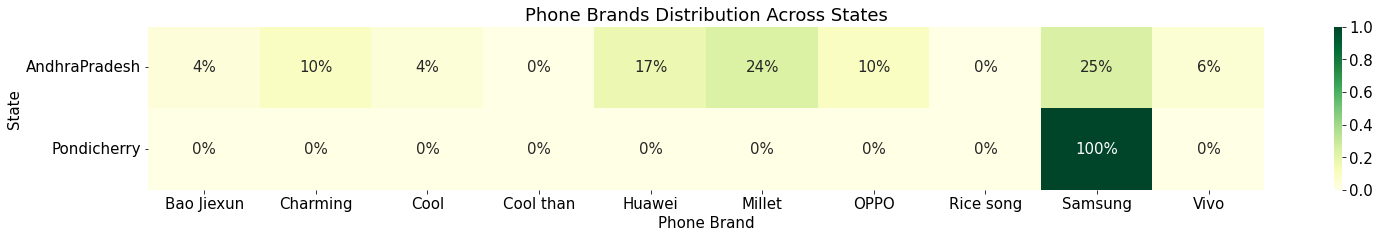

In [ ]:
plt.figure(figsize=(25,3))
role_ed_xtab = pd.crosstab(Insaid_Telecom['state'], Insaid_Telecom['Phone_Brand_EN'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlGn')
plt.title("Phone Brands Distribution Across States")
plt.xlabel('Phone Brand')
plt.ylabel('State')

Text(199.0, 0.5, 'Gender')

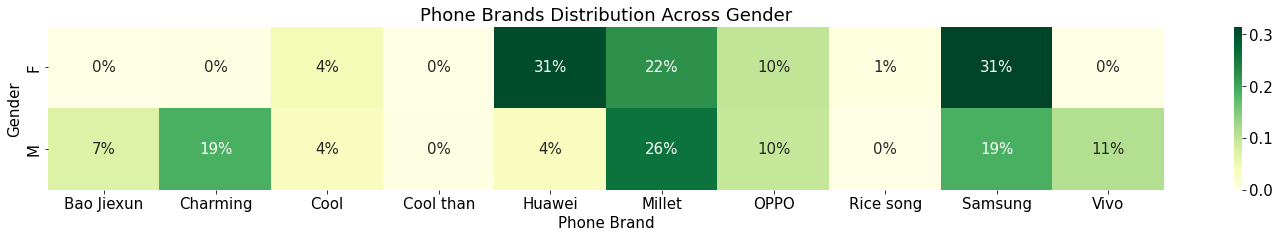

In [ ]:
plt.figure(figsize=(25,3))
role_ed_xtab = pd.crosstab(Insaid_Telecom['gender'], Insaid_Telecom['Phone_Brand_EN'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlGn')
plt.title("Phone Brands Distribution Across Gender")
plt.xlabel('Phone Brand')
plt.ylabel('Gender')

<a id = Section76></a>
#### **7.6. Distribution of Gender for each State, Age Segment and Phone Brand**

Text(46.0, 0.5, 'Gender')

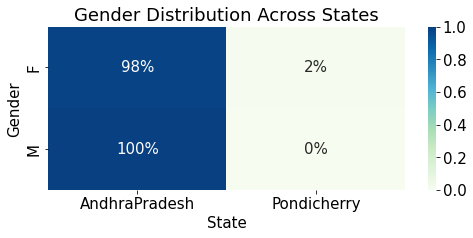

In [ ]:
plt.figure(figsize=(8,3))
role_ed_xtab = pd.crosstab(Insaid_Telecom['gender'], Insaid_Telecom['state'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='GnBu')
plt.title("Gender Distribution Across States")
plt.xlabel('State')
plt.ylabel('Gender')

Text(199.0, 0.5, 'Gender')

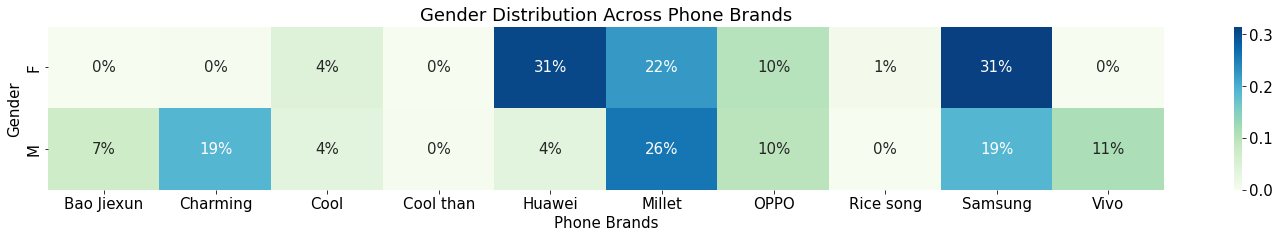

In [ ]:
plt.figure(figsize=(25,3))
role_ed_xtab = pd.crosstab(Insaid_Telecom['gender'], Insaid_Telecom['Phone_Brand_EN'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='GnBu')
plt.title("Gender Distribution Across Phone Brands")
plt.xlabel('Phone Brands')
plt.ylabel('Gender')

In [ ]:
plt.figure(figsize=(25,3))
role_ed_xtab = pd.crosstab(Insaid_Telecom['gender'], Insaid_Telecom['group'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='GnBu')
plt.title("Gender Distribution Across Age Groups")
plt.xlabel('Age Groups')
plt.ylabel('Gender')

<a id = Section77></a>
#### **7.7. Distribution of Age Segments for each State, Gender and Phone Brand**

Text(199.0, 0.5, 'State')

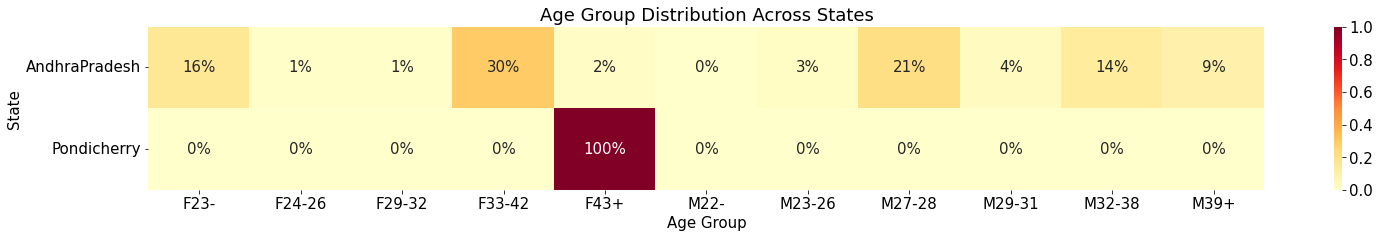

In [ ]:
plt.figure(figsize=(25,3))
role_ed_xtab = pd.crosstab(Insaid_Telecom['state'], Insaid_Telecom['group'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')
plt.title("Age Group Distribution Across States")
plt.xlabel('Age Group')
plt.ylabel('State')

Text(199.0, 0.5, 'Gender')

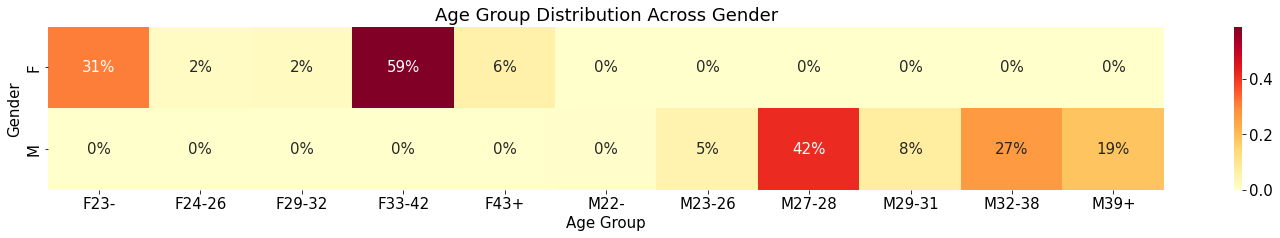

In [ ]:
plt.figure(figsize=(25,3))
role_ed_xtab = pd.crosstab(Insaid_Telecom['gender'], Insaid_Telecom['group'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')
plt.title("Age Group Distribution Across Gender")
plt.xlabel('Age Group')
plt.ylabel('Gender')

Text(199.0, 0.5, 'Phone Brand')

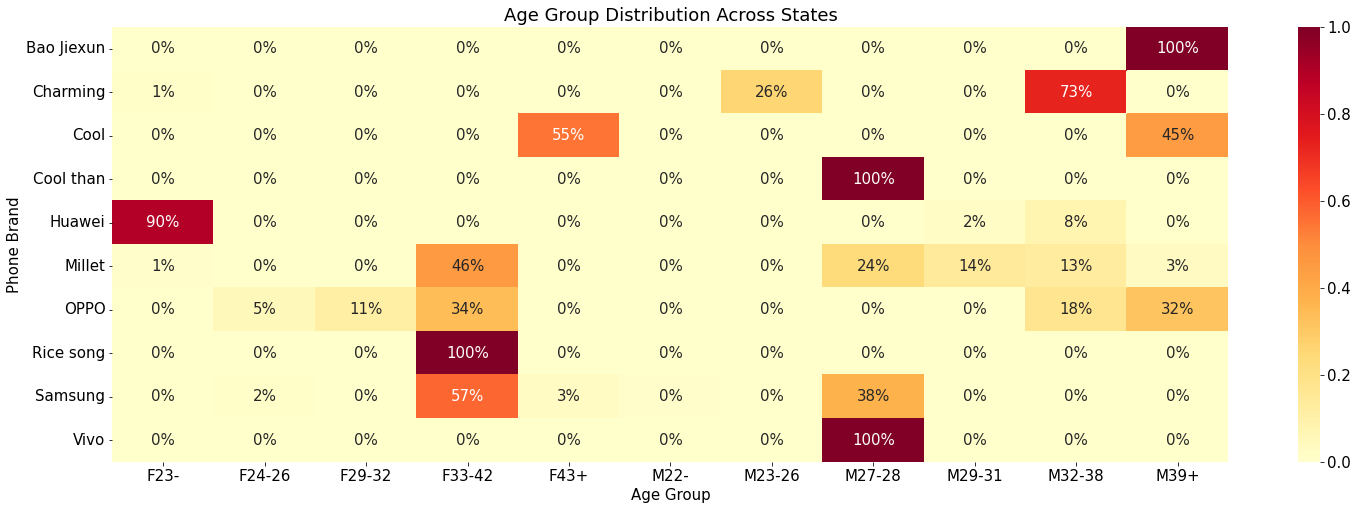

In [ ]:
plt.figure(figsize=(25,8))
role_ed_xtab = pd.crosstab(Insaid_Telecom['Phone_Brand_EN'], Insaid_Telecom['group'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')
plt.title("Age Group Distribution Across States")
plt.xlabel('Age Group')
plt.ylabel('Phone Brand')

<a id = Section78></a>
#### **7.8. Plot the Users on the Map**

In [ ]:
import folium

In [ ]:
coordinates = [Insaid_Telecom['latitude'].mean(), Insaid_Telecom['longitude'].mean()] 
map_India = folium.Map(location=coordinates, zoom_start=6)
folium.Marker(coordinates).add_to(map_India)

In [ ]:
start = 0
count = len(Insaid_Telecom)
#map_India = folium.Map()

for j in range(start, count, 1):
  coordinate = [Insaid_Telecom['latitude'][j], Insaid_Telecom['longitude'][j]]
  #map_India = folium.Map(location=coordinate, zoom_start = 5)
  folium.Marker(coordinate, popup=f'City:{Insaid_Telecom["city"][j]}').add_to(map_India)

map_India

---
<a name = Section8></a>
# **8. Summarization**
---

<a name = Section81></a>
### **8.1 Conclusion**

- Out of the 6 states data, only **2 States users data** was available in the final analysis

- Majority of the data (around **99% +**) data belongs to AndhraPradesh

- Male to Female ratio is **2:1**

- Majority of the users have **Chinese** brand phones